# **Importing the Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **Data Collection & Processing**

In [5]:
file_path = '/content/drive/MyDrive/IMDb Movies India.csv'
movie_df = pd.read_csv(file_path, encoding='latin1')

# **Exploring the Data**

In [7]:
print("Dataset Shape:", movie_df.shape)
print("\nColumn Names:\n", movie_df.columns)
movie_df.info()
movie_df.head()

Dataset Shape: (15509, 10)

Column Names:
 Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
movie_df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# **Selecting and Renaming Relevant Columns**

In [16]:
movie_df = movie_df[['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']].copy()

In [17]:
movie_df.rename(columns={
    'Name': 'Title',
    'Actor 1': 'Actor_Main',
    'Actor 2': 'Actor_Support_1',
    'Actor 3': 'Actor_Support_2'
}, inplace=True)

# **Data Cleaning**




In [18]:
movie_df.dropna(inplace=True)
movie_df['Votes'] = movie_df['Votes'].astype(str).str.replace(',', '')
movie_df['Votes'] = movie_df['Votes'].astype(int)
movie_df['Duration'] = movie_df['Duration'].astype(str).str.replace(' min', '').str.strip()
movie_df['Duration'] = pd.to_numeric(movie_df['Duration'], errors='coerce')
movie_df['Duration'] = movie_df['Duration'].fillna(movie_df['Duration'].median())

# **Feature Engineering**

In [19]:
movie_df['Full_Cast'] = movie_df['Actor_Main'] + ", " + movie_df['Actor_Support_1'] + ", " + movie_df['Actor_Support_2']
movie_df.drop(columns=['Actor_Main', 'Actor_Support_1', 'Actor_Support_2'], inplace=True)

# **Encoding Catagorical Figures**

In [20]:
genre_encoder = LabelEncoder()
director_encoder = LabelEncoder()
cast_encoder = LabelEncoder()

movie_df['Genre'] = genre_encoder.fit_transform(movie_df['Genre'])
movie_df['Director'] = director_encoder.fit_transform(movie_df['Director'])
movie_df['Full_Cast'] = cast_encoder.fit_transform(movie_df['Full_Cast'])

# **Define Features and Target**



In [21]:
features = movie_df[['Genre', 'Director', 'Full_Cast', 'Votes', 'Duration']]
target = movie_df['Rating']

# **Feature Scaling**

In [22]:
standardizer = StandardScaler()
features_scaled = standardizer.fit_transform(features)

# **Split Dataset**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# **Model Training**

In [24]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

# **Predictions and Evaluations**

In [25]:
train_pred = reg_model.predict(X_train)
test_pred = reg_model.predict(X_test)

print("Train R2:", r2_score(y_train, train_pred))
print("Test R2:", r2_score(y_test, test_pred))
print("MSE:", mean_squared_error(y_test, test_pred))

Train R2: 0.0373714905579684
Test R2: 0.04134955640474025
MSE: 1.7751748677883588


# **Scatter Plot - Predicted vs Actual**

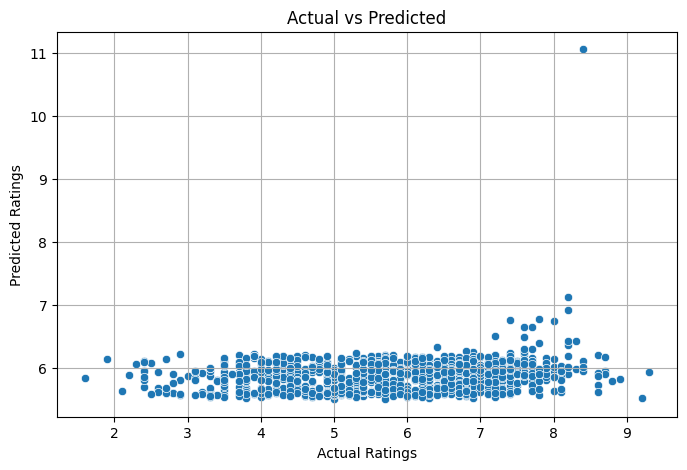

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=test_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

# **Correlation Heatmap**

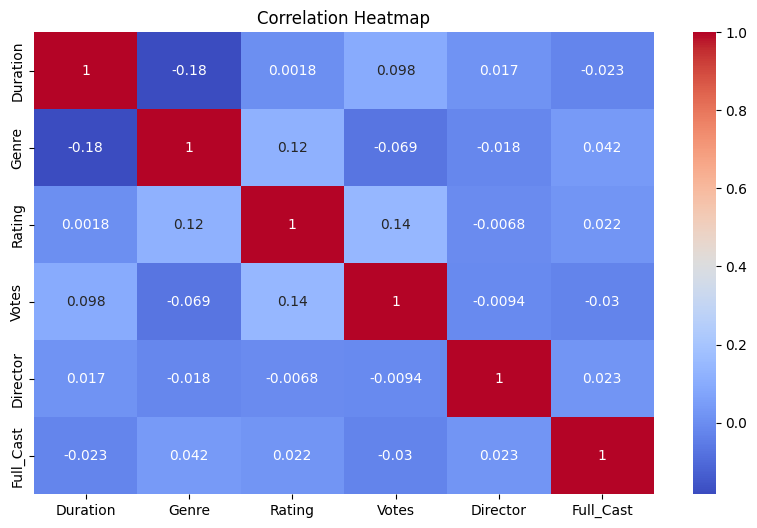

In [29]:
plt.figure(figsize=(10, 6))
numeric_data = movie_df.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Analytics Section**

***Top 10 Movies by Rating***

                     Title  Rating
8339       Love Qubool Hai    10.0
5410            Half Songs     9.7
6852                  June     9.4
5077          Gho Gho Rani     9.4
14222  The Reluctant Crime     9.4
5125           God of gods     9.3
8344          Love Sorries     9.3
1314          Ashok Vatika     9.3
1729              Baikunth     9.3
11843              Refl3ct     9.3


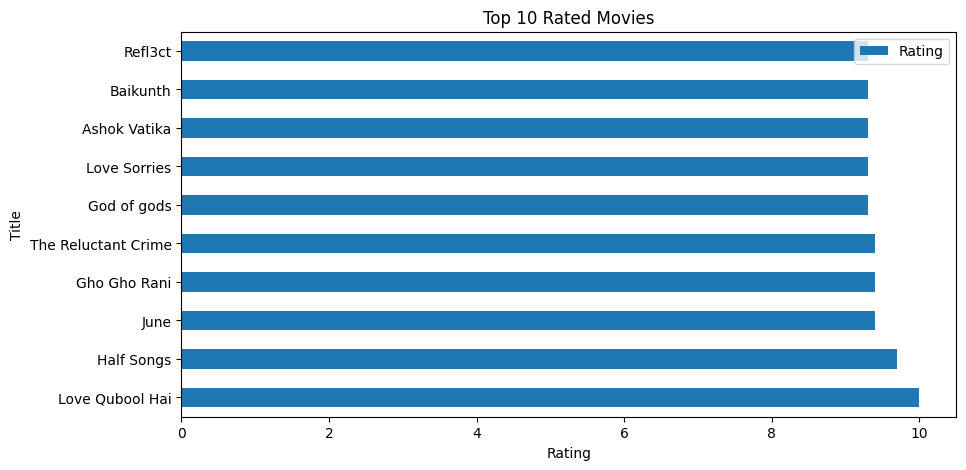

In [31]:
top_movies = movie_df.sort_values(by='Rating', ascending=False).head(10)
print(top_movies[['Title', 'Rating']])
top_movies.plot(kind='barh', x='Title', y='Rating', figsize=(10, 5), title='Top 10 Rated Movies')
plt.xlabel("Rating")
plt.show()


***Year-wise Distribution of Movies***

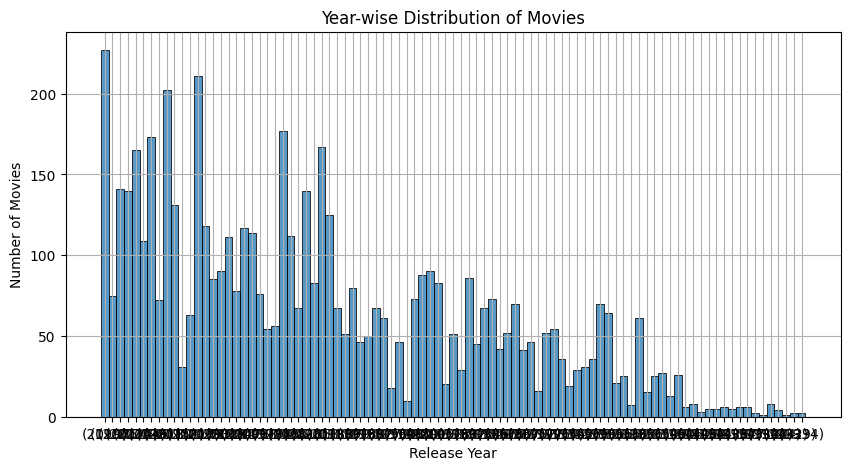

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(movie_df['Year'], bins=30)
plt.title("Year-wise Distribution of Movies")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

***Distribution of Movies by Genre***

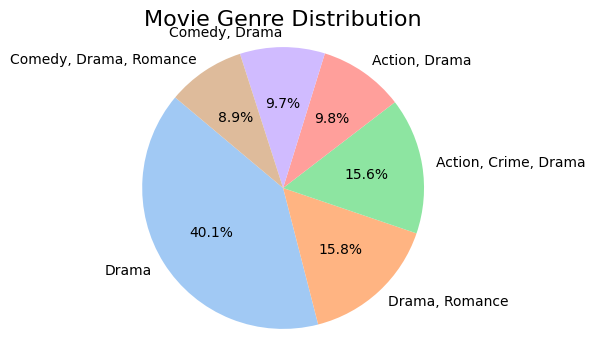

In [39]:
genre_codes = movie_df['Genre'].unique()
genre_names = genre_encoder.inverse_transform(genre_codes)

genre_map = dict(zip(genre_codes, genre_names))

movie_df['Genre_Name'] = movie_df['Genre'].map(genre_map)

top_n_genres = movie_df['Genre_Name'].value_counts().nlargest(6).reset_index()
top_n_genres.columns = ['Genre', 'Count']

plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()


***Top Directors by Number of Movies***

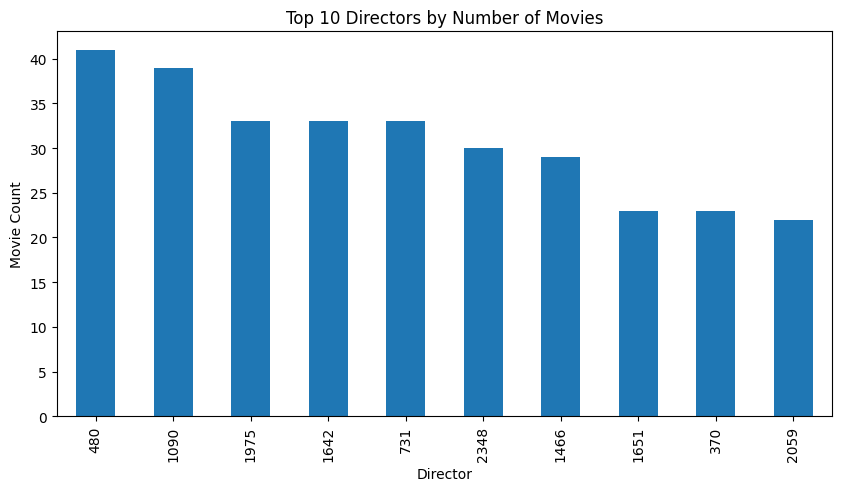

In [40]:
top_directors = movie_df['Director'].value_counts().head(10)
top_directors.plot(kind='bar', figsize=(10, 5), title='Top 10 Directors by Number of Movies')
plt.ylabel("Movie Count")
plt.show()

# **Top Full Casts by Frequency**

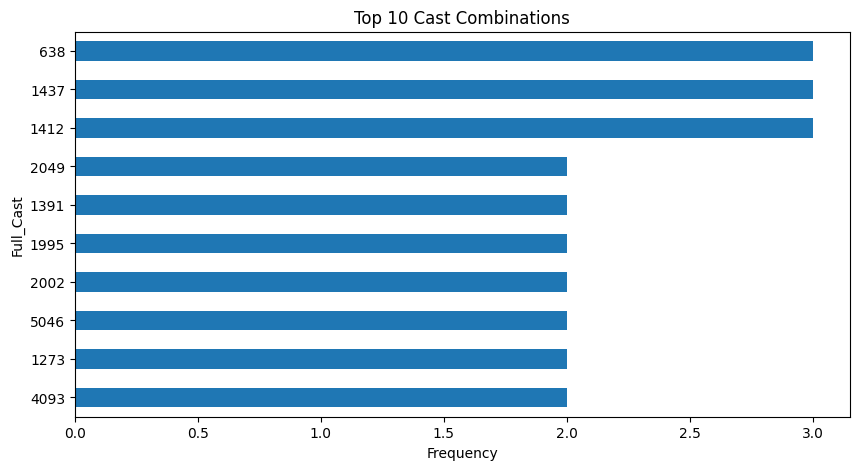

In [41]:
top_casts = movie_df['Full_Cast'].value_counts().head(10)
top_casts.plot(kind='barh', figsize=(10, 5), title='Top 10 Cast Combinations')
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.show()

***Correlation Between Number of Votes and Movie Ratings***

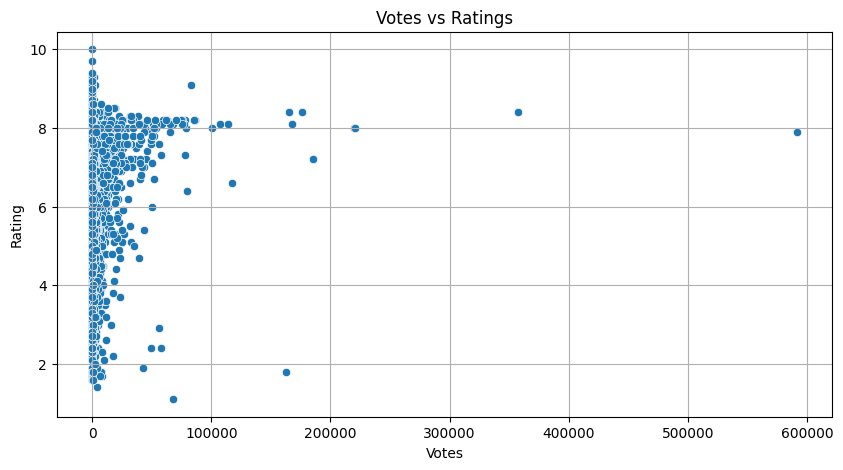

In [42]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Votes', y='Rating', data=movie_df)
plt.title("Votes vs Ratings")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

***Frequency Distribution of Leading Actors in the Dataset***

In [ ]:
actor_counts = movie_data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116
6,Dev Anand,90
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


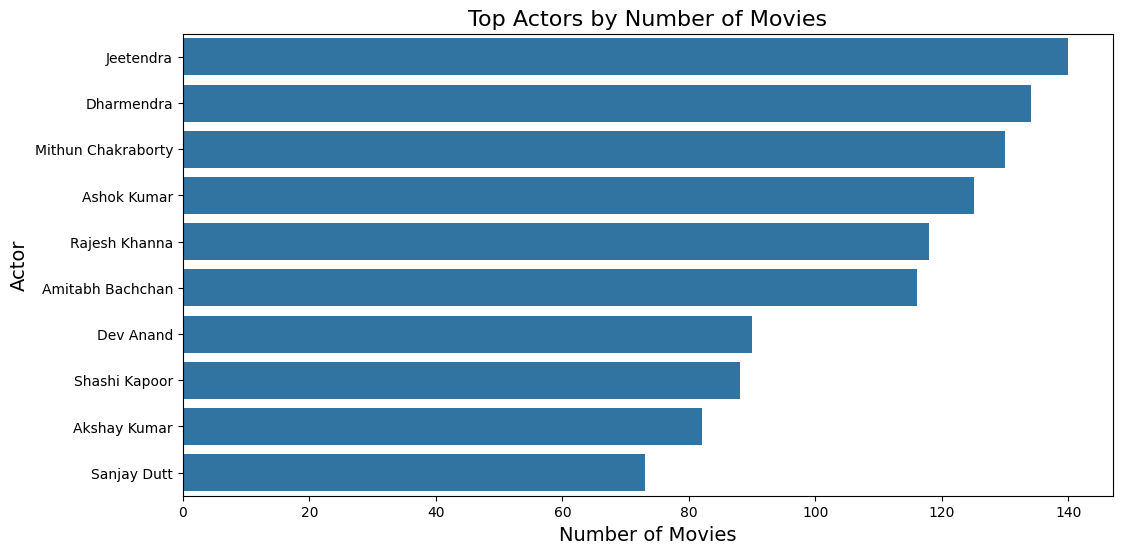

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h')

# Set plot labels and title
plt.title('Top Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)

# Show the plot
plt.show()

***Duration Distribution***

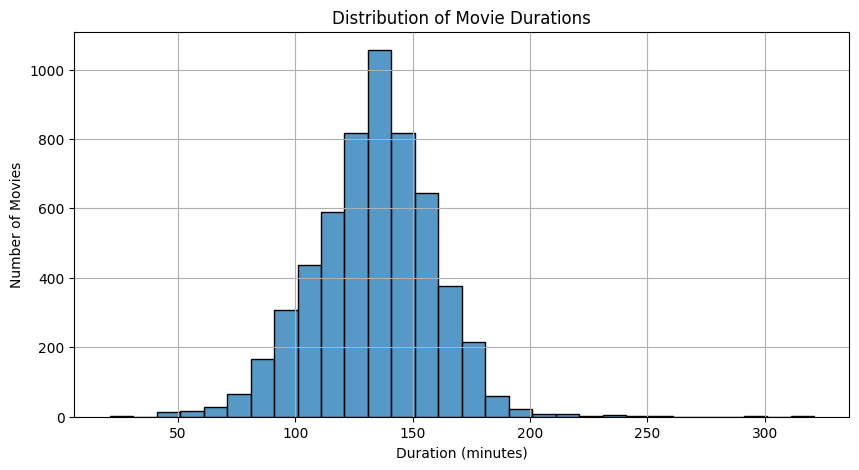

In [43]:
plt.figure(figsize=(10, 5))
sns.histplot(movie_df['Duration'], bins=30)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

***Average Rating by Genre***

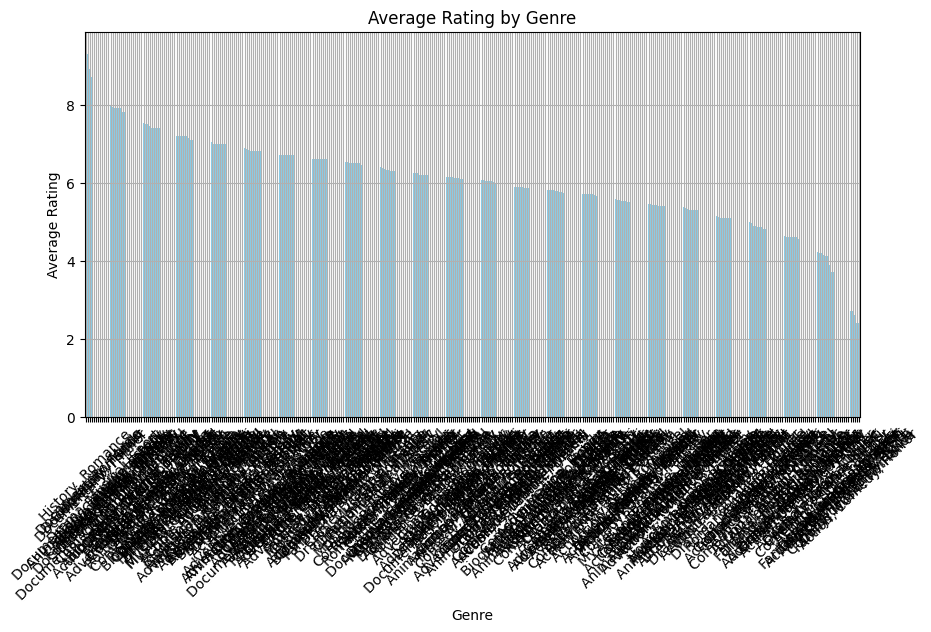

In [44]:
movie_df['Genre_Name'] = genre_encoder.inverse_transform(movie_df['Genre'])
genre_rating = movie_df.groupby('Genre_Name')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
genre_rating.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Genre')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


***Most Common Movie Duration***

In [45]:
most_common_duration = movie_df['Duration'].mode()[0]
print(f"Most common movie duration is: {most_common_duration} minutes")


Most common movie duration is: 120 minutes


***Movies with Rating > 8 and Votes > 10000***

In [46]:
popular_high_rated = movie_df[(movie_df['Rating'] > 8) & (movie_df['Votes'] > 10000)]
print("Top Movies with Rating > 8 and Votes > 10000:")
print(popular_high_rated[['Title', 'Rating', 'Votes']].sort_values(by='Rating', ascending=False).head(10))


Top Movies with Rating > 8 and Votes > 10000:
                     Title  Rating   Votes
13384      Soorarai Pottru     9.1   83029
5467           Hanky Panky     8.5   18376
2425          Black Friday     8.5   19493
14714         Vada Chennai     8.5   13120
6302    Jaane Bhi Do Yaaro     8.4   13465
3410                Dangal     8.4  165074
75                3 Idiots     8.4  357889
8228   Like Stars on Earth     8.4  175810
2984            Chhichhore     8.3   38581
14525              Tumbbad     8.3   32920


*** Top Rated Directors (by average rating)***

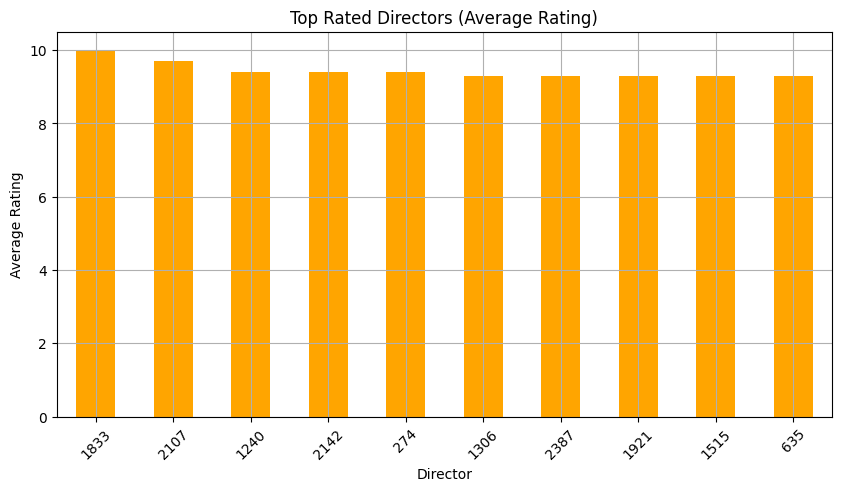

In [47]:
director_rating = movie_df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
director_rating.plot(kind='bar', color='orange')
plt.title('Top Rated Directors (Average Rating)')
plt.ylabel('Average Rating')
plt.xlabel('Director')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


***Yearly Average Rating Trend***

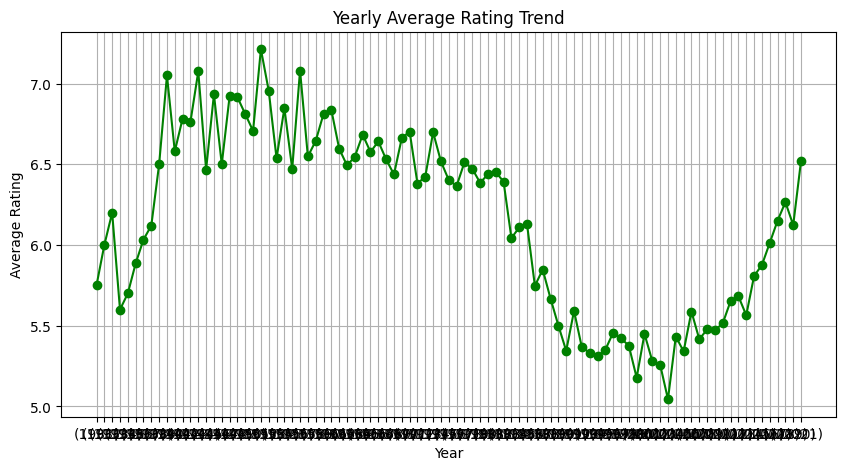

In [48]:
yearly_trend = movie_df.groupby('Year')['Rating'].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-', color='green')
plt.title('Yearly Average Rating Trend')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


***Top 10 Most Frequent Lead Actors***

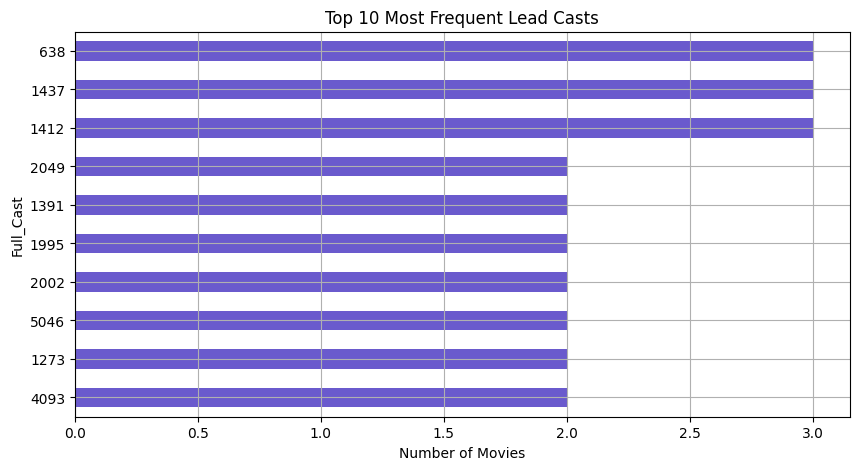

In [49]:
top_actors = movie_df['Full_Cast'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_actors.plot(kind='barh', color='slateblue')
plt.xlabel("Number of Movies")
plt.title("Top 10 Most Frequent Lead Casts")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


***Most Consistent Directors (Lowest Std Dev in Ratings)***

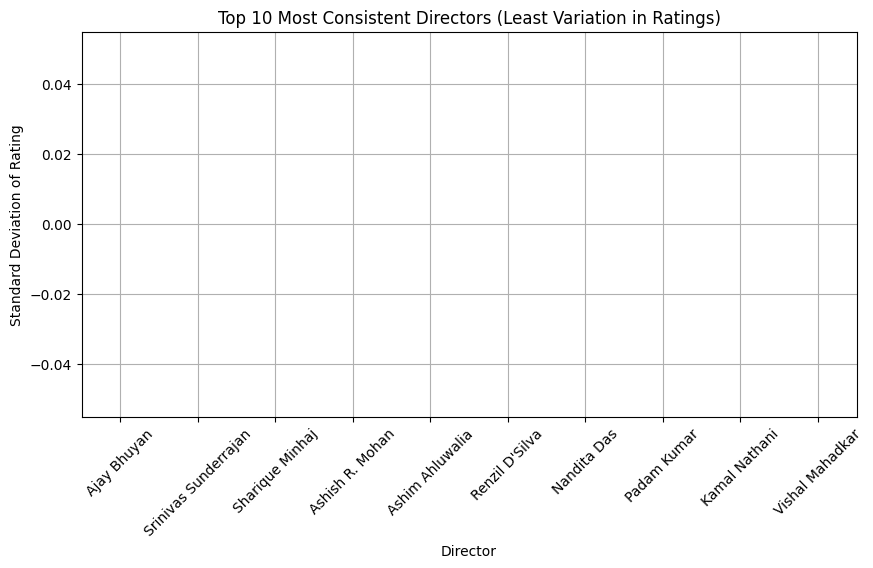

In [52]:
movie_df['Director_Name'] = director_encoder.inverse_transform(movie_df['Director'])

director_std = movie_df.groupby('Director_Name')['Rating'].std().dropna().sort_values().head(10)

plt.figure(figsize=(10, 5))
director_std.plot(kind='bar', color='teal')
plt.title("Top 10 Most Consistent Directors (Least Variation in Ratings)")
plt.xlabel("Director")
plt.ylabel("Standard Deviation of Rating")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

